# PROJECT 2 : EV Market (For Indian States)


# Importing Necessary Libraries

In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn
import os
import warnings

In [58]:
df=pd.read_csv(r"C:\Users\sp125\OneDrive\Desktop\EV 2\Segmentational-Analysis-of-EV-Market-in-India\ElectricCarData_Clean_Me.csv")


In [59]:
df

,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Battery_Pack Kwh,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro,INR
0,Tesla,Model 3 Long Range Dual Motor,4.6,233,460,70.0,161,940,Yes,AWD,Type 2 CCS,Sedan,D,5,55480,4540988.068
1,Volkswagen,ID.3 Pure,10.0,160,270,45.0,167,250,Yes,RWD,Type 2 CCS,Hatchback,C,5,30000,2455473.000
2,Polestar,2,4.7,210,400,75.0,181,620,Yes,AWD,Type 2 CCS,Liftback,D,5,56440,4619563.204
3,BMW,iX3,6.8,180,360,74.0,206,560,Yes,RWD,Type 2 CCS,SUV,D,5,68040,5569012.764
4,Honda,e,9.5,145,170,28.5,168,190,Yes,RWD,Type 2 CCS,Hatchback,B,4,32997,2700774.753
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,Nissan,Ariya 63kWh,7.5,160,330,63.0,191,440,Yes,FWD,Type 2 CCS,Hatchback,C,5,45000,3683209.500
98,Audi,e-tron S Sportback 55 quattro,4.5,210,335,86.5,258,540,Yes,AWD,Type 2 CCS,SUV,E,5,96050,7861606.055
99,Nissan,Ariya e-4ORCE 63kWh,5.9,200,325,63.0,194,440,Yes,AWD,Type 2 CCS,Hatchback,C,5,50000,4092455.000
100,Nissan,Ariya e-4ORCE 87kWh Performance,5.1,200,375,87.0,232,450,Yes,AWD,Type 2 CCS,Hatchback,C,5,65000,5320191.500


In [60]:
# finding null values in the dataset
df.isnull().sum()

Brand               0
Model               0
AccelSec            0
TopSpeed_KmH        0
Range_Km            0
Battery_Pack Kwh    0
Efficiency_WhKm     0
FastCharge_KmH      0
RapidCharge         0
PowerTrain          0
PlugType            0
BodyStyle           0
Segment             0
Seats               0
PriceEuro           0
INR                 0
dtype: int64

In [61]:
df.columns

Index(['Brand', 'Model', 'AccelSec', 'TopSpeed_KmH', 'Range_Km',
       'Battery_Pack Kwh', 'Efficiency_WhKm', 'FastCharge_KmH', 'RapidCharge',
       'PowerTrain', 'PlugType', 'BodyStyle', 'Segment', 'Seats', 'PriceEuro',
       'INR'],
      dtype='object')

### Distributing vehicle price above and below INR 4000000

In [62]:
df['CarName'] = df['Brand'] + '-' + df['Model']
df_1= df.loc[df['INR'] <=4000000]
df_2 = df.loc[df['INR'] >4000000]
t1 = ['Less than INR 4000000']
t2 = ['More thanINR 4000000']

### Count plot for PowerTrain

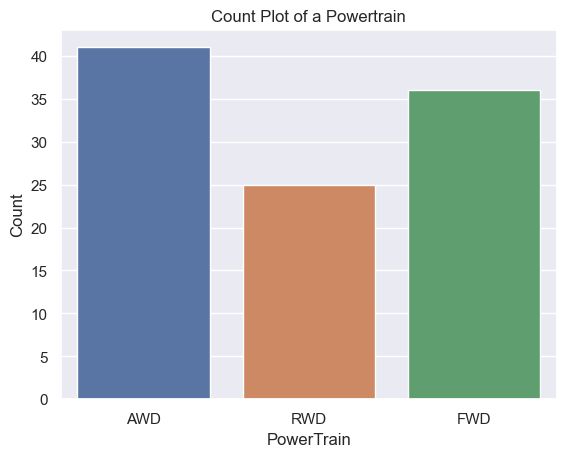

In [63]:
def train(dataframe):
    sbn.countplot(x=dataframe['PowerTrain'])
    plt.title('Count Plot of a Powertrain')
    plt.xlabel('PowerTrain')
    plt.ylabel('Count')
    
train(df)

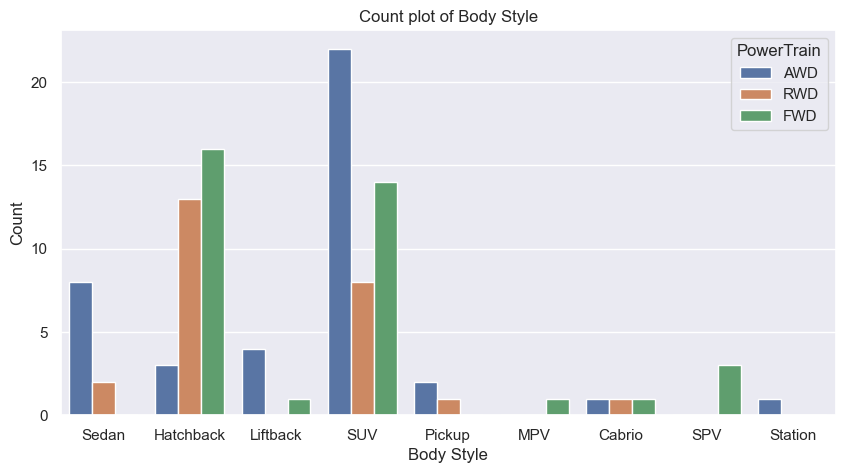

In [64]:
def bodystyle(dataframe):
    plt.figure(figsize=(10,5))
    sbn.countplot(x='BodyStyle', data=dataframe, hue='PowerTrain')
    plt.title('Count plot of Body Style')
    plt.xlabel('Body Style')
    plt.ylabel('Count')
    plt.show()
    
bodystyle(df)

### Range of Vehicles

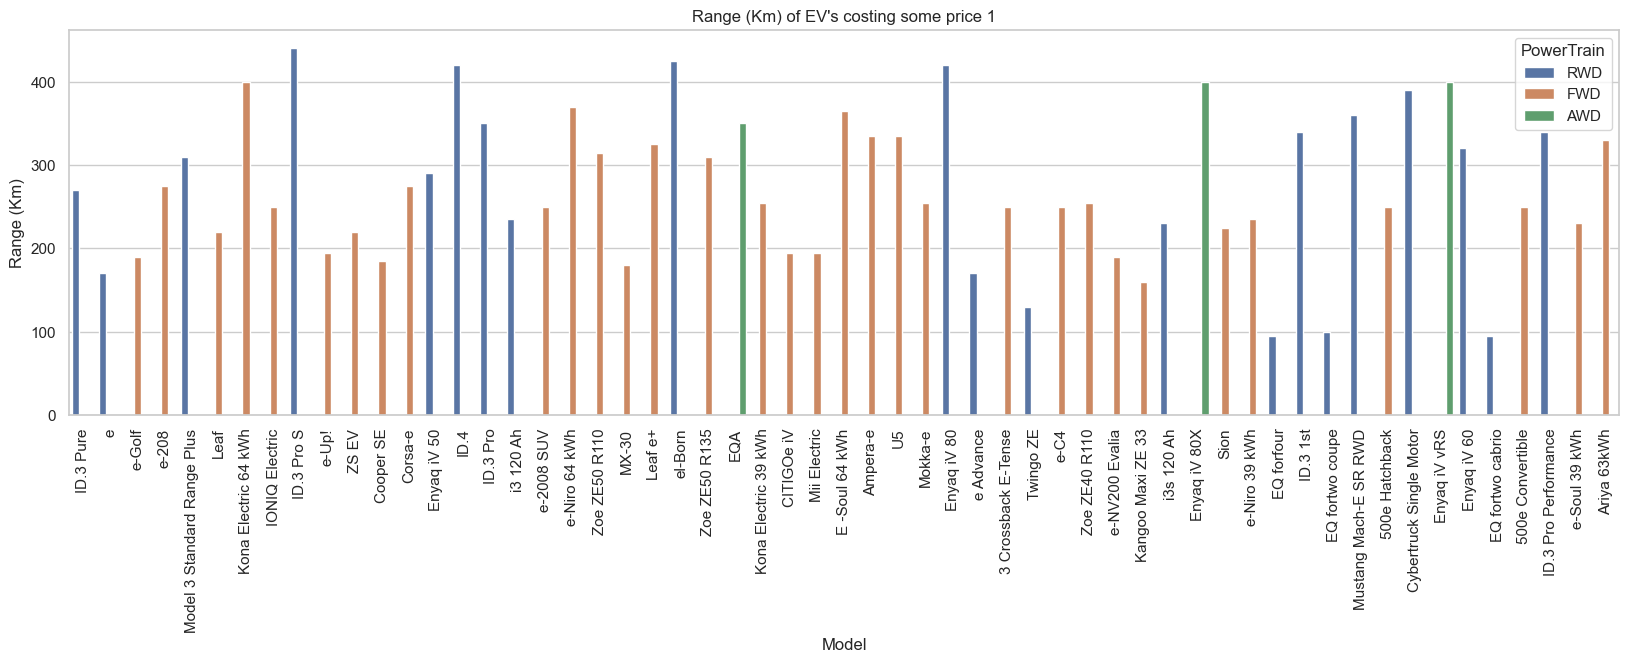

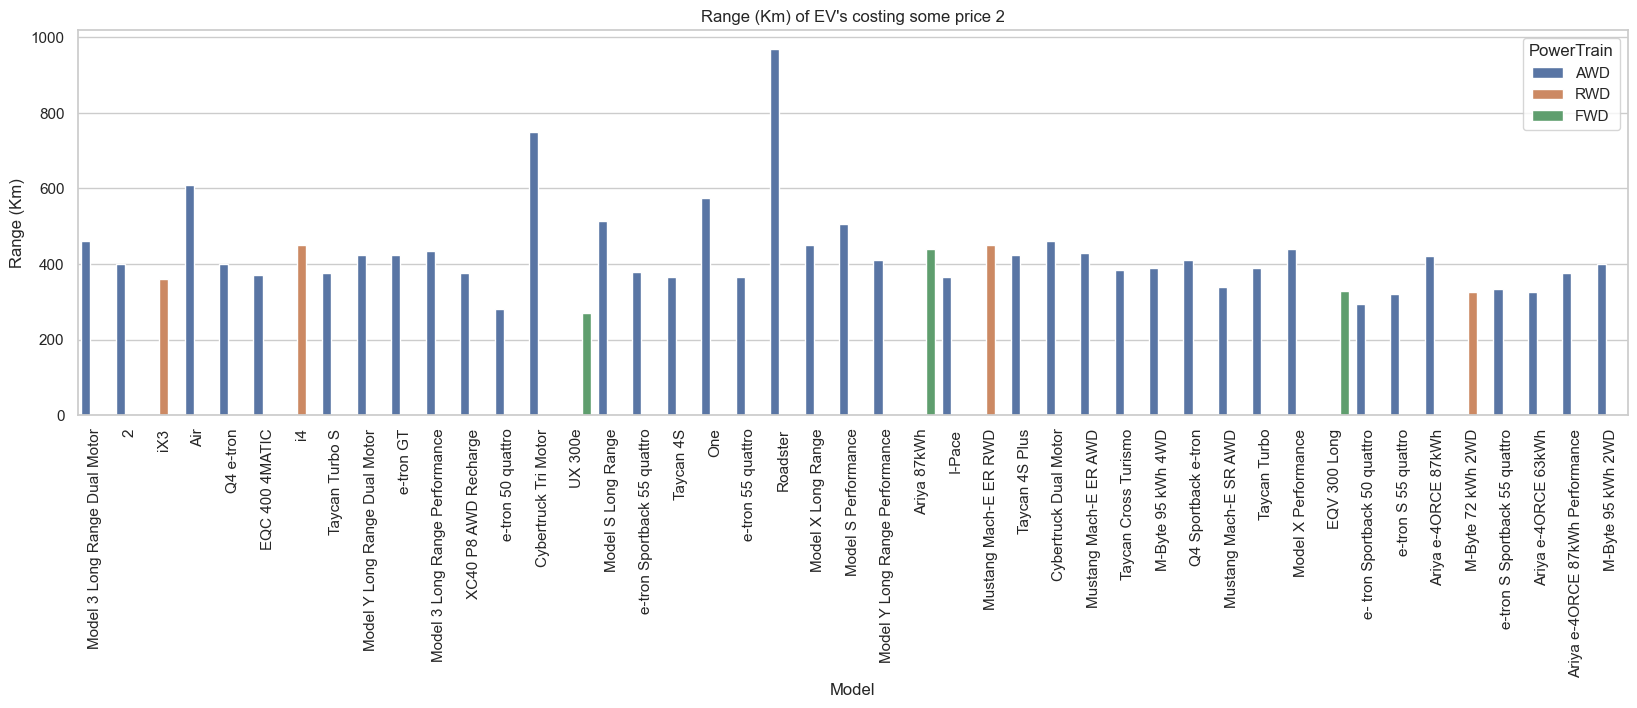

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns

def range(dataframe, price):
    plt.figure(figsize=(20, 5))
    sns.set_theme(style="whitegrid")
    sns.barplot(x='Model', y='Range_Km', data=dataframe, hue='PowerTrain')
    plt.title("Range (Km) of EV's costing {}".format(price))
    plt.ylabel('Range (Km)')
    plt.xlabel('Model')
    plt.xticks(rotation=90)
    plt.legend(title='PowerTrain')  # Adding legend for PowerTrain
    plt.show()

# Assuming t1 and t2 are defined
t1 = 'some price 1'
t2 = 'some price 2'

# Call the range function with df_1 and df_2
range(df_1, t1)
range(df_2, t2)


### Range - Battery Pack

C:\Users\sp125\AppData\Local\Temp\ipykernel_26912\204663816.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  a1.set_xticklabels(df_1['CarName'], rotation = 'vertical')


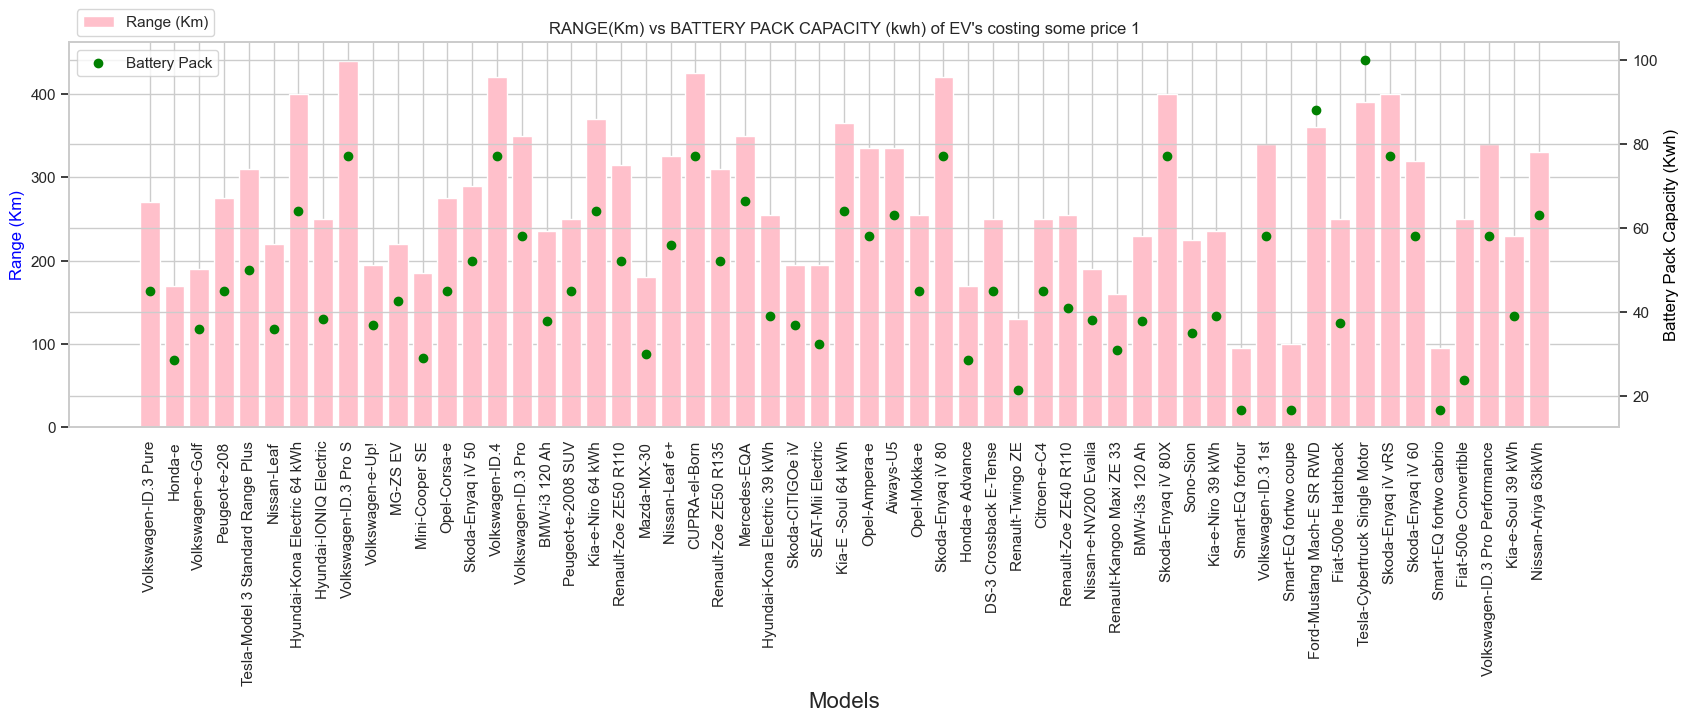

C:\Users\sp125\AppData\Local\Temp\ipykernel_26912\204663816.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  a1.set_xticklabels(df_1['CarName'], rotation = 'vertical')


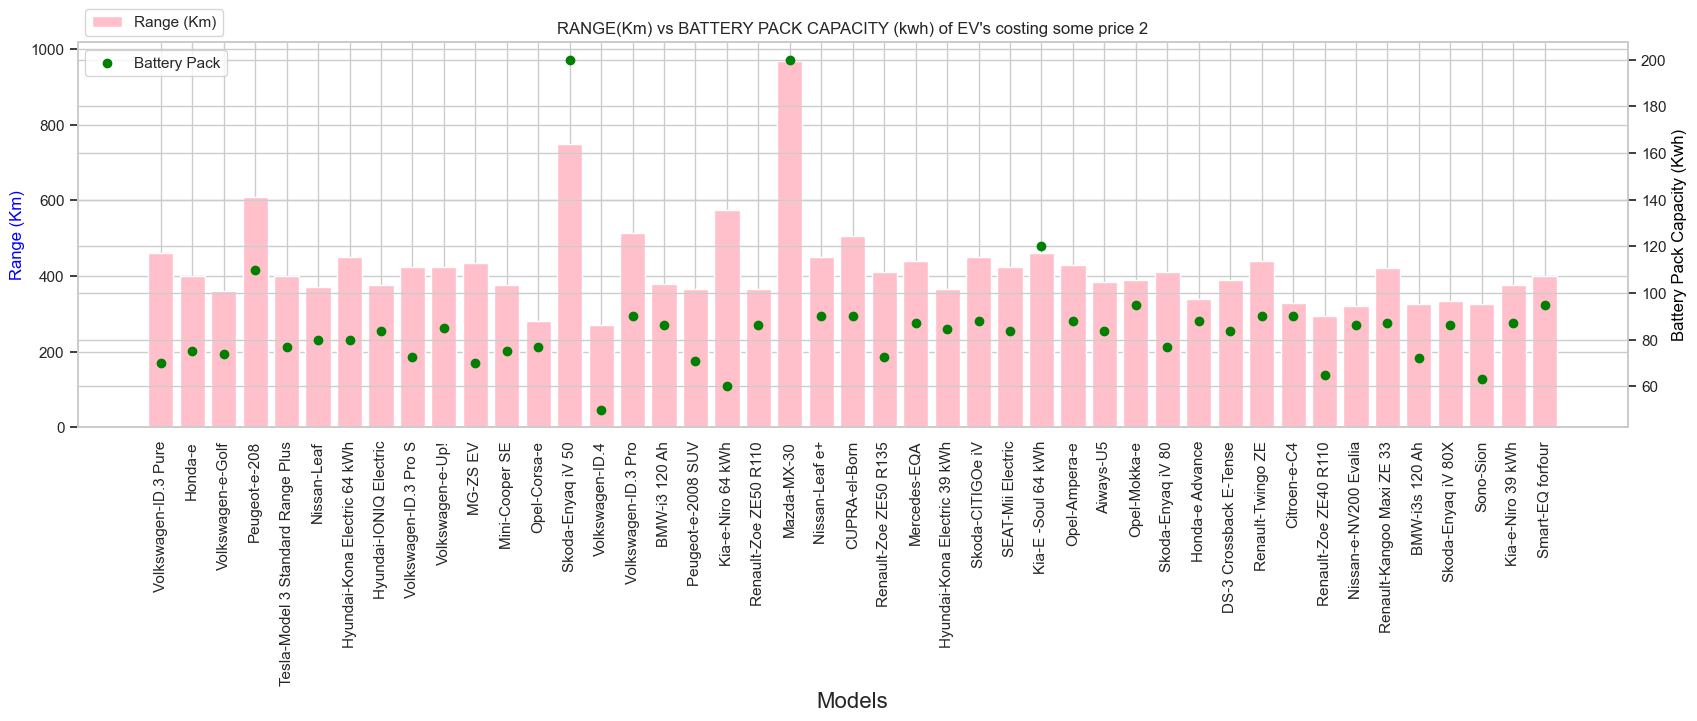

In [66]:
#range-batterypack
def range_batterypack(dataframe, text):
    fig = plt.figure(figsize=(20,5))
    a1= plt.subplot()
    a1.bar(dataframe["CarName"], dataframe["Range_Km"], label='Range (Km)', color='pink')
    plt.legend(loc= "upper left", bbox_to_anchor=(0,1.105))
    a2 = a1.twinx()
    a2.scatter(dataframe["CarName"], dataframe["Battery_Pack Kwh"], label= "Battery Pack", color= 'green')
    plt.title('''RANGE(Km) vs BATTERY PACK CAPACITY (kwh) of EV's costing {}'''.format(text), fontsize=12)
    a1.set_xlabel('Models', size= 16)
    a1.set_ylabel('Range (Km)', color = 'blue')
    a2.set_ylabel('Battery Pack Capacity (Kwh)', color='black')
    plt.legend(loc='upper left', bbox_to_anchor=(0,1))
    a1.set_xticklabels(df_1['CarName'], rotation = 'vertical')
    plt.show()
    
range_batterypack(df_1, t1)
range_batterypack(df_2, t2)

### Range - Vehicle Price

C:\Users\sp125\AppData\Local\Temp\ipykernel_26912\2840632613.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  a1.set_xticklabels(df_1['CarName'], rotation = 'vertical')


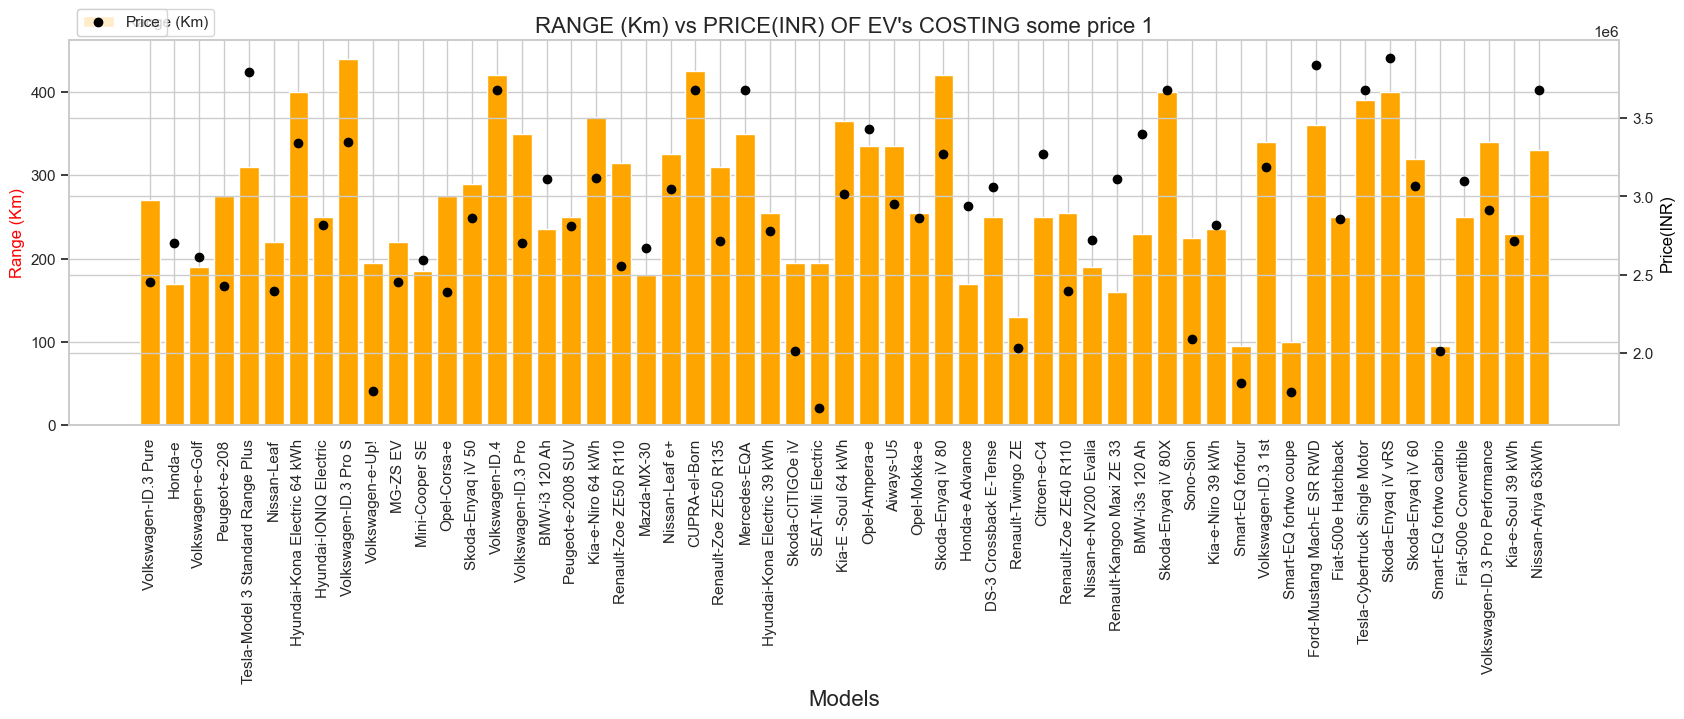

C:\Users\sp125\AppData\Local\Temp\ipykernel_26912\2840632613.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  a1.set_xticklabels(df_1['CarName'], rotation = 'vertical')


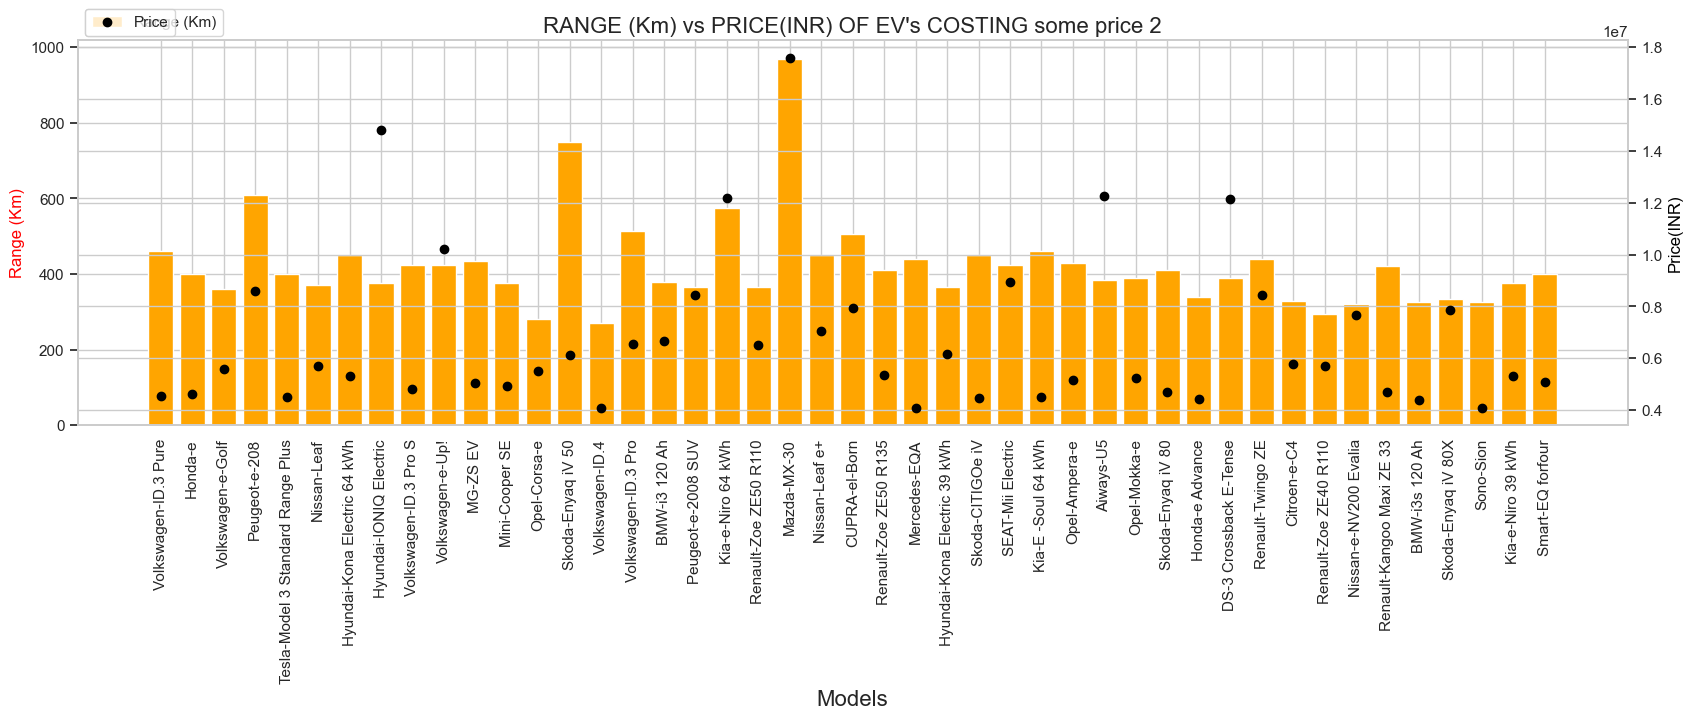

In [67]:
#Range - Price
def range_price(dataframe, text):
    fig = plt.figure(figsize=(20, 5))
    a1 = plt.subplot()
    a1.bar(dataframe['CarName'], dataframe['Range_Km'], label='Range (Km)', color='orange')
    plt.legend(loc='upper left', bbox_to_anchor = (0, 1.1))
    a2= a1.twinx()
    a2.scatter(dataframe['CarName'], dataframe['INR'], label = 'Price', color = 'black')
    plt.title('''RANGE (Km) vs PRICE(INR) OF EV's COSTING {}'''.format(text), fontsize=16)
    a1.set_xlabel('Models', size=16)
    a1.set_ylabel('Range (Km)', color = 'red')
    a2.set_ylabel('Price(INR)', color= 'black')
    plt.legend(loc = 'upper left', bbox_to_anchor = (0,1.1))
    a1.set_xticklabels(df_1['CarName'], rotation = 'vertical')
    plt.show()
    
range_price(df_1, t1)
range_price(df_2, t2)

### Acceleration(0-100km/hr)

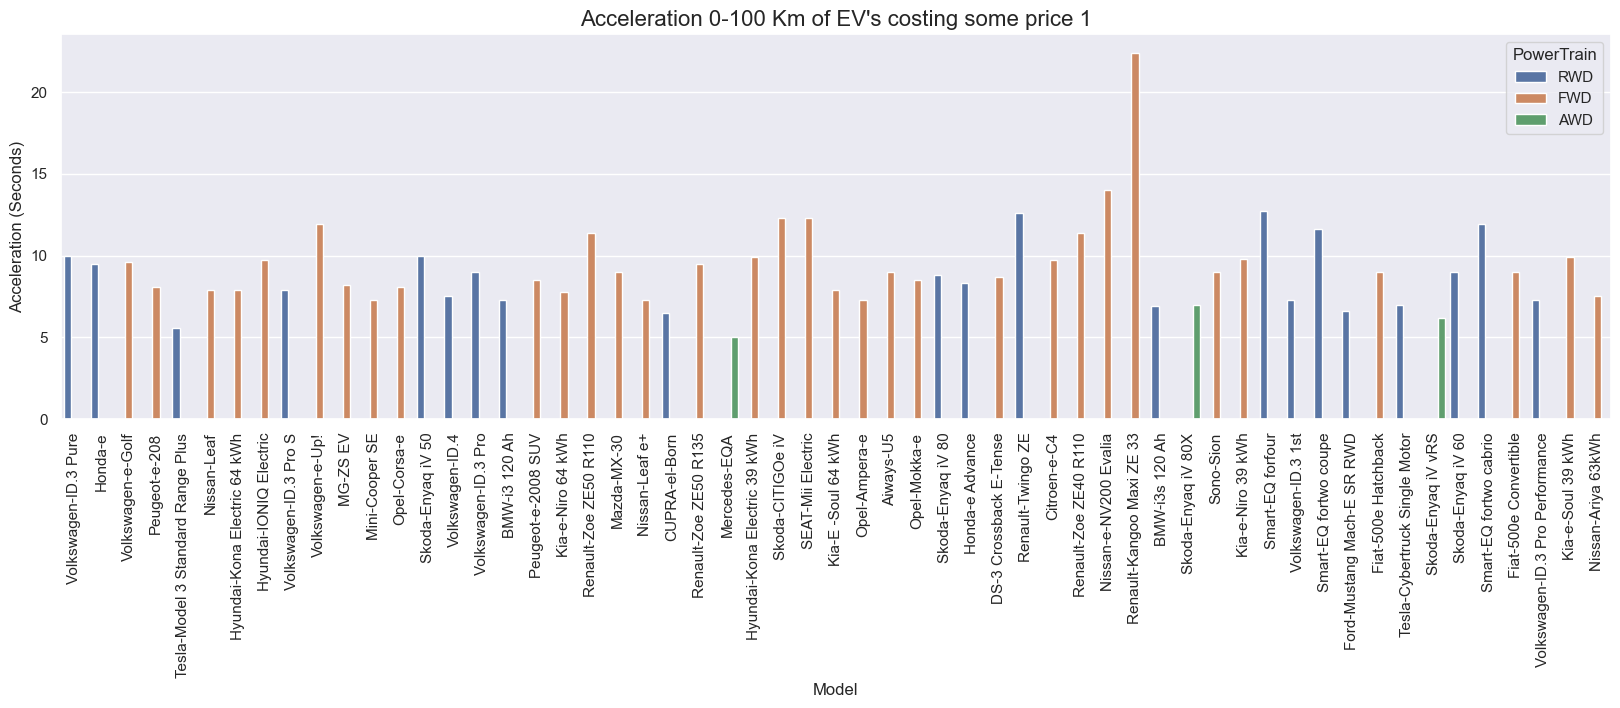

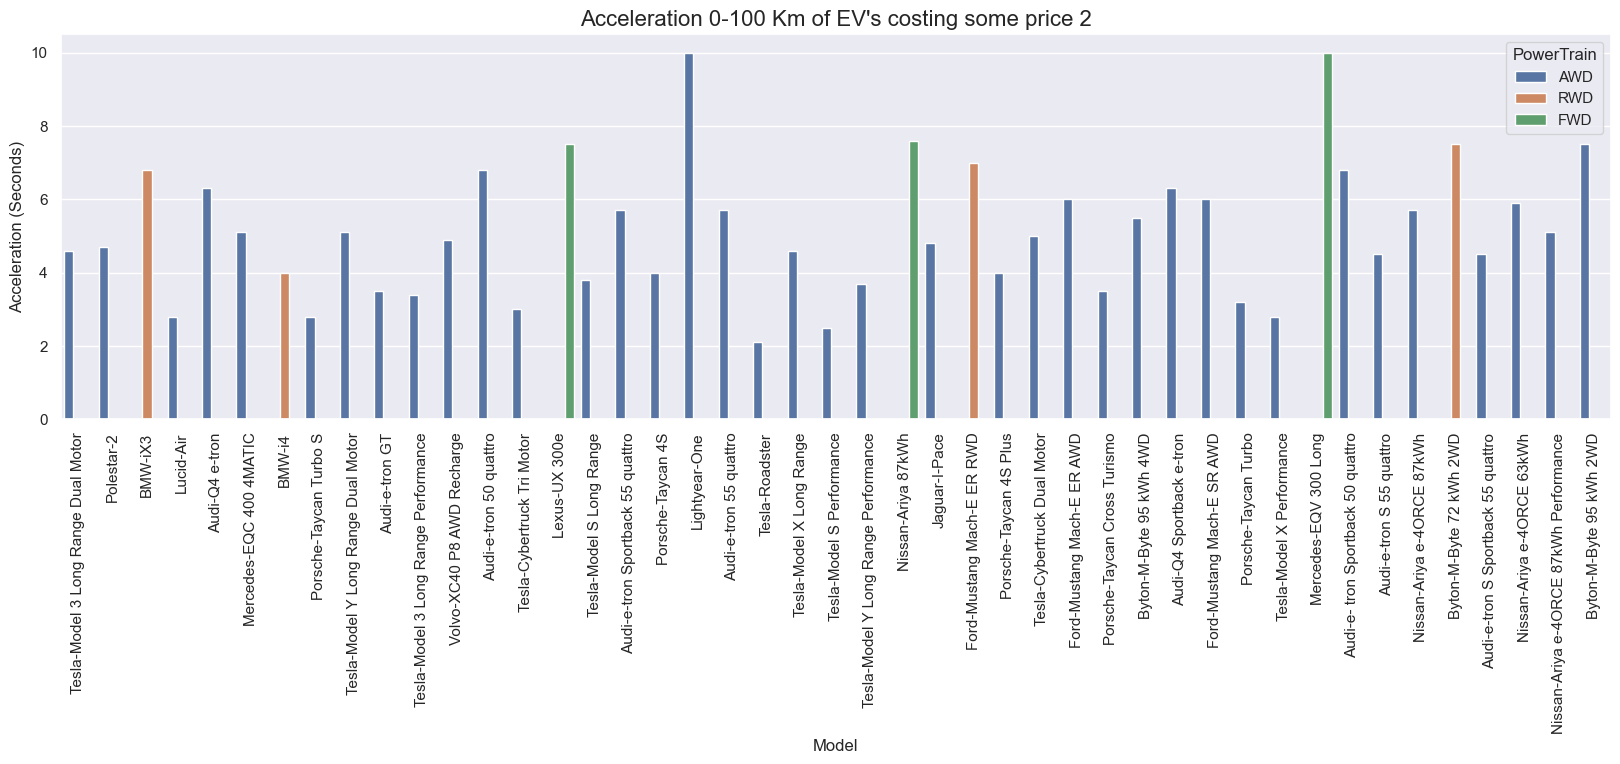

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns

def acc(dataframe, text):
    plt.figure(figsize=(20, 5))
    sns.set_theme(style="darkgrid")
    sns.barplot(x='CarName', y='AccelSec', data=dataframe, hue='PowerTrain')
    plt.title("Acceleration 0-100 Km of EV's costing {}".format(text), fontsize=16)
    plt.ylabel('Acceleration (Seconds)')
    plt.xlabel('Model')
    plt.xticks(rotation=90)
    plt.legend(title='PowerTrain')  # Adding legend for PowerTrain
    plt.show()

# Assuming t1 and t2 are defined
t1 = 'some price 1'
t2 = 'some price 2'

# Call the acc function with df_1 and df_2
acc(df_1, t1)
acc(df_2, t2)


## Basic  Analysis

### Vehicles to buy under INR 40,00000 with max range(Km)

In [69]:
pd.set_option('display.max_columns', None)
top_range_1 = df_1.sort_values(by= 'Range_Km', ascending= False)
print(top_range_1[['CarName', 'Range_Km', 'Battery_Pack Kwh', 'INR', 'RapidCharge']])

                              CarName  Range_Km  Battery_Pack Kwh  \
15              Volkswagen-ID.3 Pro S       440              77.0   
37                      CUPRA-el-Born       425              77.0   
53                  Skoda-Enyaq iV 80       420              77.0   
25                    Volkswagen-ID.4       420              77.0   
88                 Skoda-Enyaq iV vRS       400              77.0   
12       Hyundai-Kona Electric 64 kWh       400              64.0   
71                 Skoda-Enyaq iV 80X       400              77.0   
86      Tesla-Cybertruck Single Motor       390             100.0   
31                  Kia-e-Niro 64 kWh       370              64.0   
45                 Kia-E -Soul 64 kWh       365              64.0   
83         Ford-Mustang Mach-E SR RWD       360              88.0   
39                       Mercedes-EQA       350              66.5   
26                Volkswagen-ID.3 Pro       350              58.0   
94    Volkswagen-ID.3 Pro Performa

### Vehicles with best Acceleration under INR 40,00000

In [70]:
pd.set_option('display.max_columns', None)
acceleration_1 = df_1.sort_values(by= 'AccelSec')
print(acceleration_1[['CarName', 'AccelSec', 'Range_Km', 'PowerTrain', 'Battery_Pack Kwh', 'INR']])

                              CarName  AccelSec  Range_Km PowerTrain  \
39                       Mercedes-EQA       5.0       350        AWD   
8   Tesla-Model 3 Standard Range Plus       5.6       310        RWD   
88                 Skoda-Enyaq iV vRS       6.2       400        AWD   
37                      CUPRA-el-Born       6.5       425        RWD   
83         Ford-Mustang Mach-E SR RWD       6.6       360        RWD   
70                     BMW-i3s 120 Ah       6.9       230        RWD   
86      Tesla-Cybertruck Single Motor       7.0       390        RWD   
71                 Skoda-Enyaq iV 80X       7.0       400        AWD   
35                     Nissan-Leaf e+       7.3       325        FWD   
19                     Mini-Cooper SE       7.3       185        FWD   
28                      BMW-i3 120 Ah       7.3       235        RWD   
80                Volkswagen-ID.3 1st       7.3       340        RWD   
94    Volkswagen-ID.3 Pro Performance       7.3       340       

### Vehicles with Maximum Efficiency

In [71]:
pd.set_option('display.max_columns', None)
efficiency = df.sort_values(by = 'Efficiency_WhKm')
print(efficiency[['CarName', 'Efficiency_WhKm', 'Range_Km', 'PowerTrain', 'Battery_Pack Kwh', 'INR']])

                               CarName  Efficiency_WhKm  Range_Km PowerTrain  \
48                       Lightyear-One              104       575        AWD   
14              Hyundai-IONIQ Electric              153       250        FWD   
8    Tesla-Model 3 Standard Range Plus              153       310        RWD   
41        Hyundai-Kona Electric 39 kWh              154       255        FWD   
74                           Sono-Sion              156       225        FWD   
..                                 ...              ...       ...        ...   
98  Audi-e-tron S Sportback 55 quattro              258       335        AWD   
67         Tesla-Cybertruck Dual Motor              261       460        AWD   
33          Tesla-Cybertruck Tri Motor              267       750        AWD   
90            Audi-e-tron S 55 quattro              270       320        AWD   
84               Mercedes-EQV 300 Long              273       330        FWD   

    Battery_Pack Kwh           INR  
48